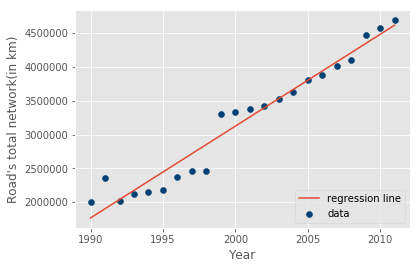

the value of m and b is
135789.535291 -268454885.486
the value of rsquare is
0.951877800451


In [9]:
import pandas as pd
import quandl
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
style.use('ggplot')
def coefficient_of_determination(Y,Yp):
    temp=0.0
    temp=sum(Y[i] for i in range(len(Y)))
    temp/=(len(Y))
    meanY=temp
    SSR=0
    for i in range(len(Y)):
        SSR+=((Yp[i]-meanY)*(Yp[i]-meanY))
    SSTO=0
    for i in range(len(Y)):
        SSTO+=((Y[i]-meanY)*(Y[i]-meanY))
    return (SSR/SSTO)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

df = quandl.get("WWDI/IND_IS_ROD_TOTL_KM",start_date="1990-12-31", end_date="2011-12-31", collapse="annual")
#print(df)
x=[i for i in range(1990,2012)]
xs=np.array(x,dtype=np.float64)
y=df["Value"]
ys=np.array(y)
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.ylabel("Road's total network(in km)")
plt.xlabel('Year')
plt.show()
print("the value of m and b is")
print (m,b)
print("the value of rsquare is")
print(r_squared)
